
<h1 align="center"> Warden : Credit Card Fraud Detector </h1>

<h2>Introduction</h2>
<p>Welcome to the EDA Notebook of WARDEN. In this notebook, we will prepare data for our ML model, perform necessary feature engineering, and find the best algorithm for our data and note the important steps for end-to-end pipeline</p>

<h2>Our Goals:</h2>
<ul>
  <li>🔍 Prepare the data for Machine learning model</li>
  <li>🛠️ Perform necessary Feature Engineering</li>
  <li>🎯️ Identify the algorithm that best works for our data</li>
  <li>📝 Notedown important steps to deal with the data for End to End pipeline</li>
  <li>⚖️ Employ best techniques to deal with imbalanced dataset and overfitting (Undersampling and Cross Validations)</li>
</ul>



<h2>Outline:</h2>
<ul>
  <li>1️⃣  Importing Essential Libraries</li>
  <li>2️⃣  Understanding our data</li>
  <li>3️⃣  Removing irrelevant Columns</li>
  <li>4️⃣  Random Undersampling</li>
  <li>5️⃣  Feature Engineering</li>
  <li>6️⃣  Train Test Split</li>
  <li>7️⃣  Model Training</li>
  <li>8️⃣  Cross Validation</li>
  <li>9️⃣  Results and findings</li>

</ul>



# Importing Essential Libraries 📚

In [29]:
from datetime import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import fbeta_score, accuracy_score, roc_curve, auc, accuracy_score, f1_score, classification_report

# Understanding our data 📊

In [30]:
# Reading the Data
df =  pd.read_csv("../data/fraud.csv")

In [31]:
# Understanding structure of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [32]:
df.loc[0:0, :]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [33]:
# Checking for null values
df.isnull().sum().max()

0

<div align="center">

| <b>Column </b>           |  <b> Description </b>           |
| ------------------------ | ------------------------------- |
| Unnamed: 0               | Index                           |
| trans_date_trans_time    | Date and Time of Transaction    |
| cc_num                   | Credit Card Number              |
| merchant                 | Merchant                        |
| category                 | Category                        |
| amt                      | Amount                          |
| first                    | First Name of Customer          |
| last                     | Last Name of Customer           |
| gender                   | Gender                          |
| street                   | Street Name                     |
| city                     | City                            |
| state                    | State                           |
| zip                      | Zip Code                        |
| lat                      | Latitude                        |
| long                     | Longitude                       |
| city_pop                 | City Population                 |
| job                      | Job                             |
| dob                      | Date of Birth                   |
| trans_num                | Transaction Number              |
| unix_time                | Unix Time                       |
| merch_lat                | Merchant Latitude              |
| merch_long               | Merchant Longitude             |
| is_fraud                 | Is Fraud                        |

</div>


# Removing irrelevant columns 🗑️

In [34]:
irr_col = ['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'city', 'state', 'street', 'zip', 'lat', 'long', 'job', 'trans_num', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
df.drop(columns=irr_col, inplace=True)

# Random Undersampling ⚖️

In [35]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal
# distribution of the classes.

df = df.sample(frac=1)

# amount of fraud classes 9651 rows.
fraud_df = df.loc[df['is_fraud'] == 1]
non_fraud_df = df.loc[df['is_fraud'] == 0][:9651]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
balanced_df = normal_distributed_df.sample(frac=1, random_state=42)
balanced_df.head()

,trans_date_trans_time,category,amt,gender,dob,is_fraud
539315,2019-08-19 07:43:44,entertainment,229.33,F,1968-02-10,0
264315,2019-05-11 17:47:27,shopping_pos,317.80,F,1978-07-08,0
1239448,2020-06-01 03:58:10,gas_transport,71.47,M,1955-07-25,0
1140679,2020-04-20 12:36:59,shopping_net,974.94,F,1968-11-22,1
1257878,2020-06-07 18:25:13,home,76.59,M,1991-08-19,0


In [36]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 539315 to 491983
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  19302 non-null  object 
 1   category               19302 non-null  object 
 2   amt                    19302 non-null  float64
 3   gender                 19302 non-null  object 
 4   dob                    19302 non-null  object 
 5   is_fraud               19302 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.0+ MB


Distribution of the Classes in the original dataset
0    0.99479
1    0.00521
Name: is_fraud, dtype: float64
Distribution of the Classes in the balanced dataset
0    0.5
1    0.5
Name: is_fraud, dtype: float64


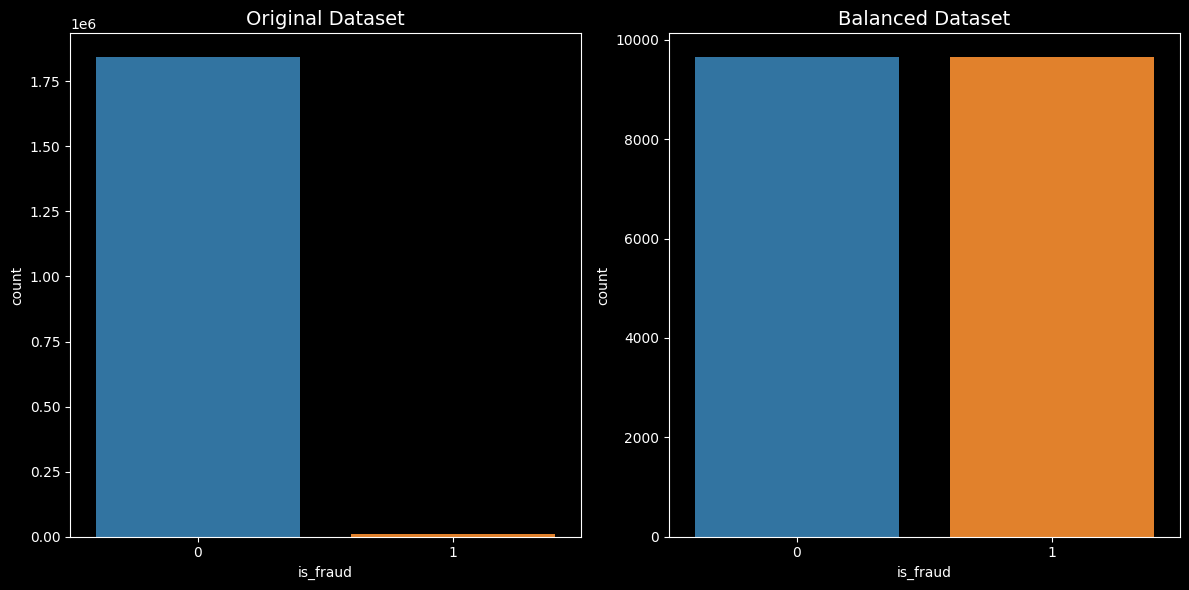

In [37]:

# Define custom colors
colors = ["#1f77b4", "#ff7f0e"]  # Blue for legitimate transactions, orange for fraudulent transactions

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First countplot
print('Distribution of the Classes in the original dataset')
print(df['is_fraud'].value_counts() / len(df))
sns.countplot(x='is_fraud', hue='is_fraud', data=df, palette=colors, ax=axes[0], legend=False)
axes[0].set_title('Original Dataset', fontsize=14)

# Second countplot
print('Distribution of the Classes in the balanced dataset')
print(balanced_df['is_fraud'].value_counts() / len(balanced_df))
sns.countplot(x='is_fraud', hue='is_fraud', data=balanced_df, palette=colors, ax=axes[1], legend=False)
axes[1].set_title('Balanced Dataset', fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


In [38]:
df = balanced_df.copy()

Which category has most frauds ?

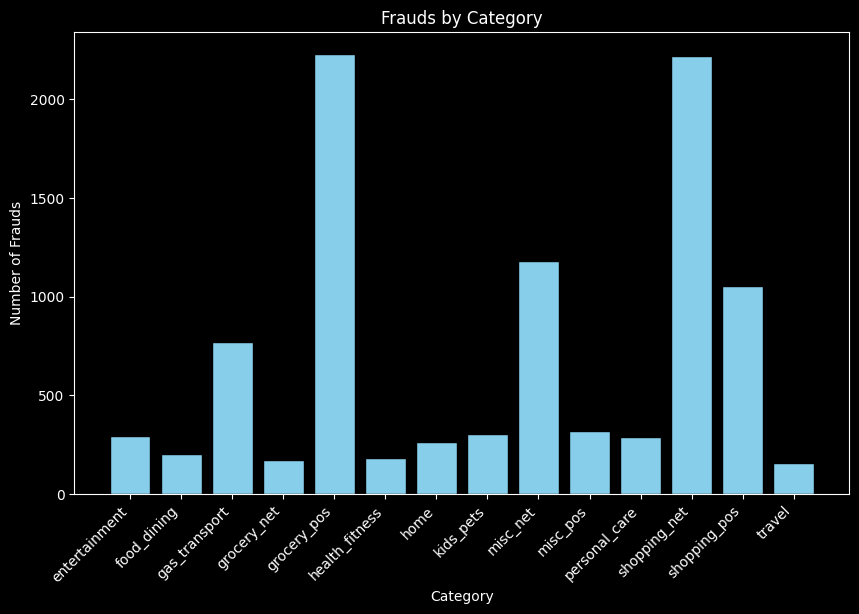

In [39]:
frauds_by_category = balanced_df[balanced_df['is_fraud'] == 1].groupby('category').size()

# Plotting
plt.figure(figsize=(10, 6))

# Plot histogram
plt.bar(frauds_by_category.index, frauds_by_category.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Frauds by Category')
plt.xlabel('Category')
plt.ylabel('Number of Frauds')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

Grocery pos and shopping contains most fraudlent transactions 

# Feature Engineering 🛠️

In [40]:


# Convert the 'trans_date_trans_time' column to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract features from the datetime column
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek

df.drop(columns=['trans_date_trans_time'], inplace=True)


df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (datetime.now() - df['dob']).astype('<m8[Y]')
df.drop(columns='dob', inplace=True)


In [41]:



target_mean_dict = []
# Dont remove this dictionary

def categorical_encoding(df, col):
    fraud_mean = df.groupby(col)['is_fraud'].mean().round(2)
    # Map the mean fraud rate back to the original DataFrame
    df[col] = df[col].map(fraud_mean)
    target_mean_dict.append(fraud_mean.to_dict())
    return df

categorical_columns = ['category']
for col in categorical_columns:  
    df = categorical_encoding(df, col)

mapping_dict = target_mean_dict[0]
reversed_dict = {v: k for k, v in mapping_dict.items()}
# this reversed dict now containes the mean values and the mapped category

df['gender'] = df['gender'].replace({'F': 0, 'M': 1})


In [42]:
# def one_hot_encoding(df, col):
#     one_hot_encoded = pd.get_dummies(df[col], prefix=col)
#     df = pd.concat([df, one_hot_encoded], axis=1)
#     df.drop(col, axis=1, inplace=True)
#     return df

# df = one_hot_encoding(df, 'category')

In [43]:
df.head()

,category,amt,gender,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_dayofweek,age
539315,0.29,229.33,0,0,2019,8,19,7,0,56.0
264315,0.55,317.80,0,0,2019,5,11,17,5,45.0
1239448,0.43,71.47,1,0,2020,6,1,3,0,68.0
1140679,0.76,974.94,0,1,2020,4,20,12,0,55.0
1257878,0.22,76.59,1,0,2020,6,7,18,6,32.0


How many fraud transactions are happening by date and time ?

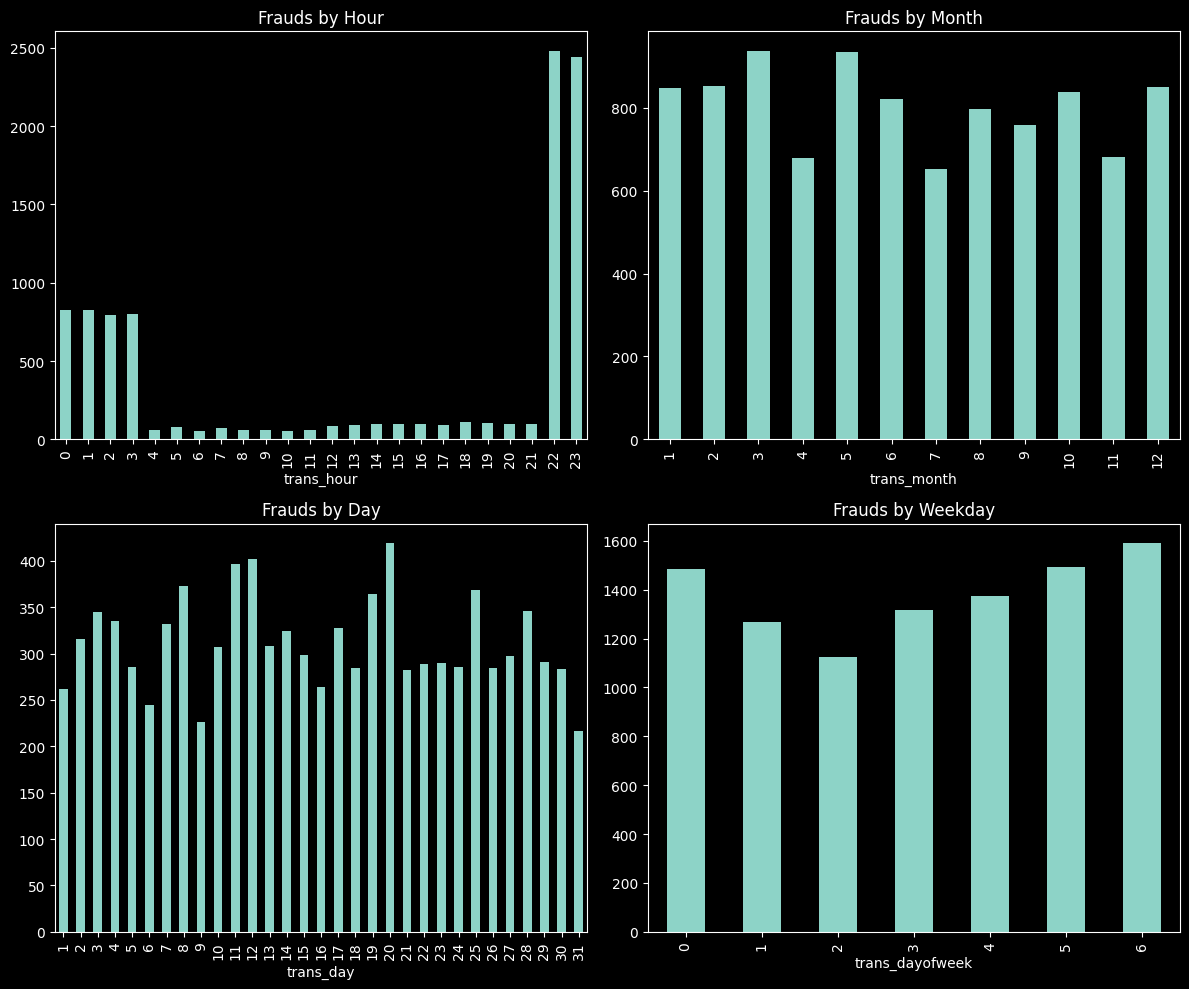

In [44]:
fraudulent_transactions = df[df['is_fraud'] == 1]

# Group fraudulent transactions by hour, month, day, and weekday
frauds_by_hour = fraudulent_transactions.groupby('trans_hour').size()
frauds_by_month = fraudulent_transactions.groupby('trans_month').size()
frauds_by_day = fraudulent_transactions.groupby('trans_day').size()
frauds_by_weekday = fraudulent_transactions.groupby('trans_dayofweek').size()
# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
frauds_by_hour.plot(kind='bar', title='Frauds by Hour')

plt.subplot(2, 2, 2)
frauds_by_month.plot(kind='bar', title='Frauds by Month')

plt.subplot(2, 2, 3)
frauds_by_day.plot(kind='bar', title='Frauds by Day')

plt.subplot(2, 2, 4)
frauds_by_weekday.plot(kind='bar', title='Frauds by Weekday')



plt.tight_layout()
plt.show()

1. Fraud transactions peak at night from 10 PM continuing to 3 AM at night
2. Fraud transactions peak during mid month from 10 to 20 
3. Fraud transactions peak during weekends

Other columns against frauds ?

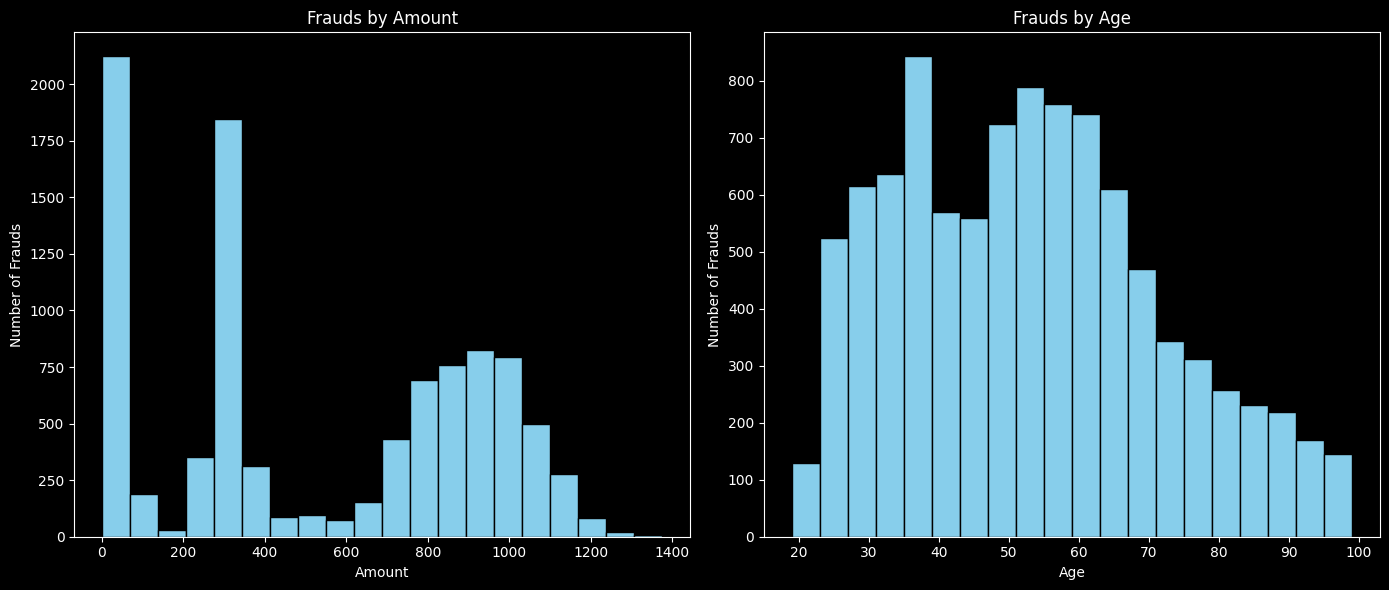

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 'amt' against frauds
axs[0].hist(df[df['is_fraud'] == 1]['amt'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Frauds by Amount')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Number of Frauds')

# Plot 'age' against frauds
axs[1].hist(df[df['is_fraud'] == 1]['age'], bins=20, color='skyblue', edgecolor='black')
axs[1].set_title('Frauds by Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of Frauds')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

1. Smaller transactions are more prone to be fraud transactions
2. Adults (above 30) are more prone to commit frauds 

# Train Test Split 🚂

In [46]:

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training 🏗️

In [47]:


@ignore_warnings(category=ConvergenceWarning)
def train_predict(learner, X_train, y_train, X_test, y_test):
    '''
    inputs:
    learner: the learning algorithm to be trained and predicted on
    - X_train: features training set
    - y_train: income training set
    - X_test: features testing set
    - y_test: income testing set
    '''
    results = {}
    # Fit the learner to the training data using slicing with 'sample_size' using .fit (training_features[:], training_labels[:])
    learner = learner.fit(X_train, y_train)

    # Get the predicted probabilities on the test set (X_test)
    predictions_test_prob = learner.predict_proba(X_test)
    # For binary classification, you can use [:, 1] to get the probability of the positive class
    predictions_test = predictions_test_prob[:, 1]

    # Get the predicted probabilities on the first 300 training samples (X_train)
    predictions_train_prob = learner.predict_proba(X_train[:300])
    # For binary classification, you can use [:, 1] to get the probability of the positive class
    predictions_train = predictions_train_prob[:, 1]

    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train.round())
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test.round())
    # Compute F-score on the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train.round(), pos_label=1, average='binary', beta=0.5)
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test.round(), pos_label=1, average='binary', beta=0.5)
    # Store predicted probabilities in the results
    results['y_prob'] = predictions_test_prob
    
    print(f"{learner.__class__.__name__} trained")
    # Return the results
    return results


In [48]:
clf_A = LogisticRegression(random_state=42)
clf_B = GaussianNB()
clf_C = DecisionTreeClassifier(random_state=42)
clf_D = RandomForestClassifier(random_state=42)
clf_E = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=42, algorithm='SAMME')
clf_list = [clf_A, clf_B, clf_C, clf_D, clf_E]

all_results = []

# Iterate through each classifier
for clf in clf_list:
    # Train and predict for the current classifier
    results = train_predict(clf, X_train, y_train, X_test, y_test)
    # Append the results to the list
    all_results.append(results)


LogisticRegression trained
GaussianNB trained
DecisionTreeClassifier trained
RandomForestClassifier trained
AdaBoostClassifier trained


# Evaluation 📈

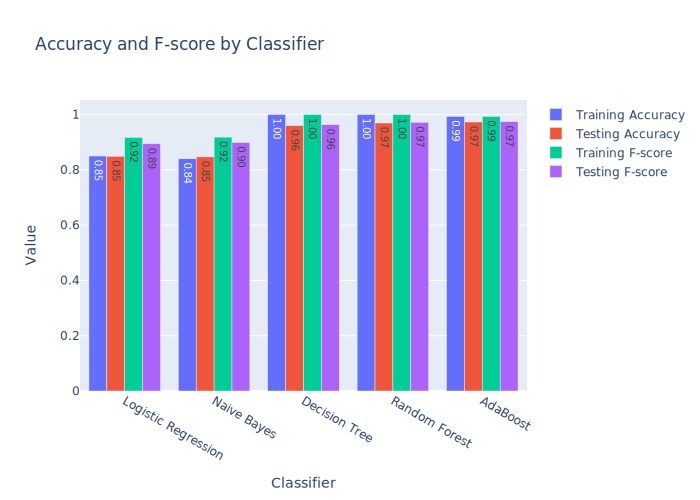

In [49]:
def plot_metrics(all_results):
    """
    Plot the accuracy and F-score for each classifier.
    
    Parameters:
    all_results (list): List of dictionaries containing results for each classifier.
    """
    # List of classifiers
    classifiers = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost']
    
    # Number of classifiers
    n_classifiers = len(classifiers)
    
    # Bar width
    width = 0.35
    
    # Index for the classifiers
    ind = list(range(n_classifiers))
    
    # Creating traces for accuracy
    acc_train_values = [result['acc_train'] for result in all_results]
    acc_test_values = [result['acc_test'] for result in all_results]
    acc_train_text = [f'{acc:.2f}' for acc in acc_train_values]
    acc_test_text = [f'{acc:.2f}' for acc in acc_test_values]
    trace_acc_train = go.Bar(x=classifiers, y=acc_train_values, name='Training Accuracy', text=acc_train_text, textposition='auto')
    trace_acc_test = go.Bar(x=classifiers, y=acc_test_values, name='Testing Accuracy', text=acc_test_text, textposition='auto')
    
    # Creating traces for F-score
    f_train_values = [result['f_train'] for result in all_results]
    f_test_values = [result['f_test'] for result in all_results]
    f_train_text = [f'{f:.2f}' for f in f_train_values]
    f_test_text = [f'{f:.2f}' for f in f_test_values]
    trace_f_train = go.Bar(x=classifiers, y=f_train_values, name='Training F-score', text=f_train_text, textposition='auto')
    trace_f_test = go.Bar(x=classifiers, y=f_test_values, name='Testing F-score', text=f_test_text, textposition='auto')
    
    # Creating subplots
    fig = go.Figure(data=[trace_acc_train, trace_acc_test])
    fig.add_trace(trace_f_train)
    fig.add_trace(trace_f_test)
    
    # Update layout
    fig.update_layout(barmode='group', xaxis_title='Classifier', yaxis_title='Value', title='Accuracy and F-score by Classifier')
    
    # Show plot
    fig.show()

# Assuming you have already populated all_results with the results for each classifier
# Now, call the function to plot the metrics
plot_metrics(all_results)

# Cross Validation ✅

We will use stratified cross validation to check wether our data is overfitting or not.

In [50]:
@ignore_warnings(category=ConvergenceWarning)
def train_and_evaluate_classifiers(X, y, clf_list):
    skf = StratifiedKFold(n_splits=10)
    # Initialize dictionary to store evaluation results for each classifier
    clf_evaluation_results = {}

    # Iterate through each classifier
    for clf_idx, clf in enumerate(clf_list):
        print(f"Evaluating Classifier {clf_idx+1}: {clf.__class__.__name__}")
        # Initialize lists to store evaluation results for current classifier
        accuracy_scores = []
        f1_scores = []

        # Iterate through folds
        for i, (train_index, test_index) in enumerate(skf.split(X, y)):
            # Extract training and testing subsets
            X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
            y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

            # Train the classifier
            clf.fit(X_train_fold, y_train_fold)

            # Make predictions on the testing subset
            y_pred_fold = clf.predict(X_test_fold)

            # Evaluate model performance
            accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
            f1_fold = f1_score(y_test_fold, y_pred_fold)

            # Append evaluation results to lists
            accuracy_scores.append(accuracy_fold)
            f1_scores.append(f1_fold)

        # Calculate the average evaluation results across folds for the current classifier
        avg_accuracy = np.mean(accuracy_scores)
        avg_f1 = np.mean(f1_scores)
        print("------------------------")
        # Store average evaluation results for the current classifier
        clf_evaluation_results[clf_idx] = {'Classifier': clf.__class__.__name__,
                                            'Average Accuracy': avg_accuracy,
                                            'Average F1 Score': avg_f1}

    # Print evaluation results for each classifier
    for clf_idx, results in clf_evaluation_results.items():
        print(f"Evaluation Results for Classifier {clf_idx+1}:")
        print(f"Classifier: {results['Classifier']}")
        print(f"Average Accuracy: {results['Average Accuracy']}")
        print(f"Average F1 Score: {results['Average F1 Score']}")
        print("------------------------")
        
    return clf_evaluation_results
# Call the function with your X, y, and clf_list arguments
clf_evaluation_results = train_and_evaluate_classifiers(X, y, clf_list)

Evaluating Classifier 1: LogisticRegression
------------------------
Evaluating Classifier 2: GaussianNB
------------------------
Evaluating Classifier 3: DecisionTreeClassifier
------------------------
Evaluating Classifier 4: RandomForestClassifier
------------------------
Evaluating Classifier 5: AdaBoostClassifier
------------------------
Evaluation Results for Classifier 1:
Classifier: LogisticRegression
Average Accuracy: 0.8518807136359856
Average F1 Score: 0.8355611560617747
------------------------
Evaluation Results for Classifier 2:
Classifier: GaussianNB
Average Accuracy: 0.8478396116807045
Average F1 Score: 0.8278475362459
------------------------
Evaluation Results for Classifier 3:
Classifier: DecisionTreeClassifier
Average Accuracy: 0.9642526490341657
Average F1 Score: 0.9642592925591064
------------------------
Evaluation Results for Classifier 4:
Classifier: RandomForestClassifier
Average Accuracy: 0.9703660483574511
Average F1 Score: 0.9703382853759328
---------------

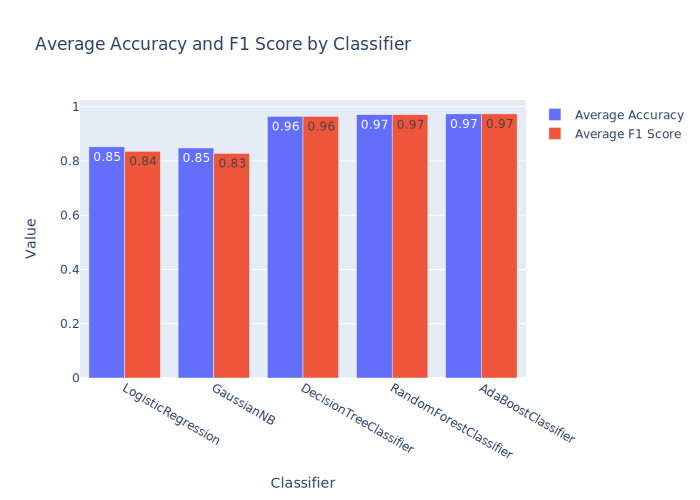

In [51]:
def plot_evaluation_results(clf_evaluation_results):
    """
    Plot the average accuracy and F1 score for each classifier.
    
    Parameters:
    clf_evaluation_results (dict): Dictionary containing evaluation results for each classifier.
    """
    # Extract classifier names, average accuracy, and average F1 score
    classifiers = [result['Classifier'] for result in clf_evaluation_results.values()]
    avg_accuracy = [result['Average Accuracy'] for result in clf_evaluation_results.values()]
    avg_f1_score = [result['Average F1 Score'] for result in clf_evaluation_results.values()]

    # Create traces for average accuracy and F1 score
    trace_accuracy = go.Bar(x=classifiers, y=avg_accuracy, name='Average Accuracy', text=[f'{acc:.2f}' for acc in avg_accuracy], textposition='auto')
    trace_f1_score = go.Bar(x=classifiers, y=avg_f1_score, name='Average F1 Score', text=[f'{f1:.2f}' for f1 in avg_f1_score], textposition='auto')

    # Create a figure
    fig = go.Figure(data=[trace_accuracy, trace_f1_score])

    # Update layout
    fig.update_layout(barmode='group', xaxis_title='Classifier', yaxis_title='Value', title='Average Accuracy and F1 Score by Classifier')

    # Show plot
    fig.show()

# Assuming clf_evaluation_results contains the evaluation results for each classifier
# Now, call the function to plot the evaluation results
plot_evaluation_results(clf_evaluation_results)


### Results shows that algorithms are generalizing good to whole dataset and not overfitting

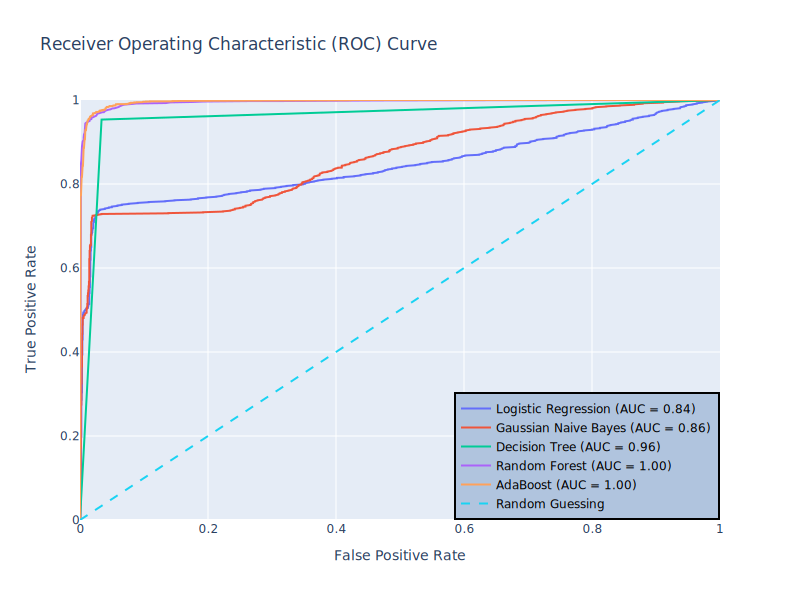

In [52]:

def plot_roc_curve(clf_results, clf_labels):
    fig = go.Figure()
    for i, result in enumerate(clf_results):
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'][:, 1])
        roc_auc = auc(fpr, tpr)
        fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{clf_labels[i]} (AUC = {roc_auc:.2f})'))

    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
    fig.update_layout(
        title='Receiver Operating Characteristic (ROC) Curve',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        xaxis=dict(range=[0, 1]),
        yaxis=dict(range=[0, 1]),
        width=800,
        height=600,
        legend=dict(
            x=1,
            y=0,
            xanchor='right',
            yanchor='bottom',
            traceorder='normal',
            font=dict(
                family='sans-serif',
                size=12,
                color='black'
            ),
            bgcolor='LightSteelBlue',
            bordercolor='Black',
            borderwidth=2
        ),
    )
    fig.show()

# Plot ROC curve for each classifier
plot_roc_curve(all_results, ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost'])


In [53]:
### Adaboost has been proven better than other algorithms

In [54]:
y_pred = clf_E.predict(X_test)

In [55]:

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1930
           1       0.99      0.99      0.99      1931

    accuracy                           0.99      3861
   macro avg       0.99      0.99      0.99      3861
weighted avg       0.99      0.99      0.99      3861



### Both recall and precision are good and suggest that our model effectively minimizes both false positives and false negatives.
<p><span style="color: red; font-weight: bold;">NOTE:</span> It is not realistic to get scores this good, partly because this is synthetically generated data from free resources. It is difficult to obtain real-world transaction data due to confidentiality and monetary issues. However, the process remains the same.</p>

# Results and Findings 🔍

- Adaboost has been proven to be the best algorithm out of other classifiers.
- After applying stratified K-fold cross-validation, we can say that chances of overfitting is low
- We even checked by replacing mean encoding to one hot encoding as mean encoding often leads to data leakage, though we didn't found any significant change in metrics.
- The data has been thoroughly checked, and necessary data engineering steps will be taken in the End-to-End pipeline.
<br>
<br>
----------------------------------------------------------------------------------------


# Data Pipeline Steps 🔧

- Remove irrelevant columns
- Feature Engineering (trans_date_trans_time, dob)
- Categorical Encoding (category, gender)
- Model building (Adaboost)